<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-\amily:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Gradient Descent
              
</p>
</div>

Data Science Cohort Live NYC 2023
<p>Phase 3</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

In data science:
- Supervised learning
- Trying to train model or input/output predictive function
- Learn model parameters/weights.

Optimal weights/parameters:
    
- where defined cost function L is at a minimum.

With linear regression is squared loss:

$$ L =  |\textbf{y }- X \textbf{w} |^2 $$

for 1D linear regression is compact linear algebra notation for:

$$ L =  \sum_i|y_i - w_1 x_i - w_0 |^2 = \\ \sum_i|y_i - \hat{y}_i |^2  $$

Slope weight including bias. 

2D minimization problem.


Parameters:
- $w_0$, $w_1$

Let's find $w_0$ and $w_1$ that minimizes $L$:
- Minimize partial derivatives: 
-  $\frac{\partial L}{\partial w_0} = 0$ and $ \frac{\partial L}{\partial w_1} = 0 $

<img src = "images\local_minimum.jpg" width = 300 />

Minimum: partial derivates in **both** directions vanish

Import sympy and do some mathemagic:

In [2]:
from sympy import *
from sympy.abc import x,y

ModuleNotFoundError: No module named 'sympy'

Define the loss function:

In [ ]:
x, y, i, N, w0, w1 = symbols("x, y, i, N, w0, w1")
L = summation((Indexed('y',i) - Indexed('x',i)*w1 - w0)**2 ,(i,1,N))
L

In [ ]:
grad1 = diff(L, w0)
grad1

In [ ]:
grad2 = diff(L, w1)
grad2

Setting grad1 to 0, solve for $w_0$:
$$ w_0 = \bar{y} - w_1\bar{x} $$

Plug in $w_0$, solve for $w_1$ setting grad2 to 0.

Algebra happened:


$$ w_1 = \frac{ \Big(\sum_i^Nx_iy_i) - N \bar{y}\bar{x} }{\Big(\sum_i^Nx_i^2\Big) - N \bar{x}^2}$$

With ordinary least squares linear regression: there's always a formula.
- Minimizing cost function
- Analytically find solution for model weights.

Can also use a computer to iteratively converge to minimum and get weights.

- Useful when you can't solve for weights analytically.
- When cost function as a function of fit parameters is complex.
- Most problems in machine learning.



**Solution: Gradient descent**

Look at it work for our simple linear regression:

<center><img src = "Images/simple_regression.gif" width = 500/></center>
<center>What's it doing?</center>

1. Randomly initialize weight vector $\textbf{w} = \textbf{w}^{(0)}$.
2. Compute cost function $J(\textbf{w}^{(0)})$.
2. Compute gradient of cost $J$: Gradient is in direction of highest slope.
3. Step weight vector in opposite direction for descent.

<center><img src = "Images/grad_desc_2d.png" width = 700/></center>


2. #### Engineering the weight vector step $\Delta \textbf{w}^{(0)}$

- step weight vector in opposite direction of gradient for descent.
- $\Delta \textbf{w}^{(0)}$ proportional to $ - \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}}$


$$ \textbf{w}^{(0)} \rightarrow \textbf{w}^{(0)} + \Delta \textbf{w}^{(0)} $$


$$ \textbf{w}^{(0)} \rightarrow \textbf{w}^{(0)} - \alpha \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$

i.e., 

$$ \Delta \textbf{w}^{(0)} = - \alpha \nabla_\textbf{w}J\Big|_{\textbf{w} = \textbf{w}^{(0)}}$$

where $\alpha$ is a small parameter known as the **learning rate**.

Or component-wise:

$$ w_1^{(0)} \rightarrow w_1^{(0)} - \alpha \frac{\partial J}{\partial w_1}\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$


$$ w_2^{(0)} \rightarrow w_2^{(0)} - \alpha \frac{\partial J}{\partial w_2}\Big|_{\textbf{w} = \textbf{w}^{(0)}} $$

<center><img src = "Images/grad_desc_2d.png" width = 700/></center>


Now at new weight vector $\textbf{w}^{(1)} = \begin{bmatrix}w_1^{(1)} & w_2^{(1)}\end{bmatrix} $
- Recompute cost function $J(w_1^{(1)}, w_2^{(1)})$
- Recompute gradient vector  $\nabla_\textbf{w} J\Big|_{\textbf{w} = \textbf{w}^{(1)}}$


- Take step down in opposite gradient direction: $$ \Delta \textbf{w}^{(1)} = - \alpha \nabla_\textbf{w} J\Big|_{\textbf{w} = \textbf{w}^{(1)}} $$
- Now we are at $\textbf{w} = \textbf{w}^{(2)}$

Pictorially, we are doing this at each step:

<center><img src = "Images/gradient_anim.gif" width = 700 /> <center>

Play this game, until weights converge to minimum:
- Closer to minimum: gradients gets small
- weight updates get vanishingly small.
- weights at/near optimal value.

Kill the loop. We are done.

<img src = "Images/simple_regression.gif" width = 500 /> 

- But let's do this ourselves. Step by step.
- First create some data

In [3]:
import statsmodels.api as sm
import numpy as np
# Randomly created data in x & y
np.random.seed(27)

X = np.random.rand(30, 1)
X = sm.add_constant(X) # add a constant
y = np.random.normal(0, 3, 30).reshape(-1,1)
X

array([[1.        , 0.42572141],
       [1.        , 0.81458374],
       [1.        , 0.73539729],
       [1.        , 0.8680032 ],
       [1.        , 0.38338077],
       [1.        , 0.97945663],
       [1.        , 0.89319435],
       [1.        , 0.20971517],
       [1.        , 0.74182765],
       [1.        , 0.66314332],
       [1.        , 0.88680146],
       [1.        , 0.85801271],
       [1.        , 0.74926221],
       [1.        , 0.87014472],
       [1.        , 0.18675584],
       [1.        , 0.32556672],
       [1.        , 0.37293743],
       [1.        , 0.79371303],
       [1.        , 0.15106027],
       [1.        , 0.1699427 ],
       [1.        , 0.08116909],
       [1.        , 0.30517534],
       [1.        , 0.7832898 ],
       [1.        , 0.16290618],
       [1.        , 0.0706413 ],
       [1.        , 0.70107117],
       [1.        , 0.18097988],
       [1.        , 0.59891725],
       [1.        , 0.41526365],
       [1.        , 0.51357225]])

Step 1: Initialize weights randomly

In [4]:
def init_weight(X):
    num_features = X.shape[1]
    w_0 = np.random.normal(loc =0 , 
                           scale = 4, 
                           size = (num_features,
                                   1))
    
    return w_0
    

In [5]:
w_0 = init_weight(X)
w_0

array([[-0.14356018],
       [-0.65190229]])

Step 2: Compute cost function

In [6]:
L

NameError: name 'L' is not defined

In vector form with augmented $X$ is:
 $$ (\textbf{y} - X \textbf{w})^T(\textbf{y} - X \textbf{w}) = |\textbf{y} - X \textbf{w}|^2 $$ 

In [7]:
# in vectorized form 

def comp_cost(X, y, w):
    
    costfunc = (y - X@w).T @ (y - X@w)
    
    return costfunc[0][0]

In [8]:
comp_cost(X, y, w_0)

370.88335045802603

2. Define and compute the gradient:
    - $\nabla_\textbf{w} |\textbf{y}- X\textbf{w}|^2 = - 2 ( X^T\textbf{y} - X^TX \textbf{w} )$

In [9]:
def compute_gradient(X,y,w):
    
    grad = 2*((X.T@X)@w - X.T@y)
    
    return grad

In [10]:
q = compute_gradient(X,y,w_0)
q

array([[-111.59780406],
       [ -55.5929707 ]])

3. Update your weights in the right direction.

In [14]:
def update_weight(w, grad, learning_rate = 0.01):
    dw =  -learning_rate*grad 
    w_new = w + dw
    
    return w_new
    

In [15]:
w_0

array([[-0.14356018],
       [-0.65190229]])

In [16]:
update_weight(w_0, q)

array([[ 0.97241786],
       [-0.09597258]])

Now do all this in a loop and store cost function values and gradients along the way:

In [40]:
def gradient_descent_optimizer(X, y, learning_rate = 0.01, num_iter = 250):
    
    #initialize
    J = {}
    grads = {}
    w_history = {}
    
    w = init_weight(X)
    
    for trial in range(num_iter):
        
        # compute and store cost in dictionary
        J[trial] = comp_cost(X, y ,w) 
        
        # compute the gradient of J at current w
        grads[trial] = compute_gradient(X, y, w)
        
        w = update_weight(w, grads[trial], learning_rate = learning_rate)
        w_history[trial] = w
        
    # return final weight and cache
    cache = {'cost': J, 'gradients': grads, 'weight_history': w_history}
    return w, cache
        

Let punch the button and run the gradient descent on our least squares problem:

In [41]:
w, cache = gradient_descent_optimizer(X, y, learning_rate = 0.0005)

In [42]:
w

array([[ 2.67164158],
       [-2.38397411]])

In [33]:
cache['cost']

{0: 273.2405078268022,
 1: 272.68026188677237,
 2: 272.16285104889573,
 3: 271.68499929280557,
 4: 271.2436811512238,
 5: 270.8361025474128,
 6: 270.4596830981982,
 7: 270.1120397704743,
 8: 269.79097178767597,
 9: 269.49444669061825,
 10: 269.22058746441706,
 11: 268.9676606499561,
 12: 268.7340653645996,
 13: 268.5183231626127,
 14: 268.31906867106676,
 15: 268.1350409419195,
 16: 267.9650754654971,
 17: 267.80809679479273,
 18: 267.66311173386663,
 19: 267.529203047203,
 20: 267.4055236501828,
 21: 267.291291243874,
 22: 267.18578336015923,
 23: 267.0883327858155,
 24: 266.998323336567,
 25: 266.9151859543402,
 26: 266.838395103007,
 27: 266.7674654397829,
 28: 266.70194874120165,
 29: 266.6414310641932,
 30: 266.5855301242862,
 31: 266.5338928743271,
 32: 266.4861932683823,
 33: 266.44213019665847,
 34: 266.4014255783627,
 35: 266.3638226004222,
 36: 266.3290840909089,
 37: 266.2969910168655,
 38: 266.2673410970201,
 39: 266.2399475206011,
 40: 266.2146377641391,
 41: 266.191252498

A plot of the cost function as a function of iteration is helpful:

In [34]:
%%capture cost_plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

trials = cache['cost'].keys()
cost_history = cache['cost'].values()

fig, ax = plt.subplots()
sns.lineplot( x =trials, y = cost_history, marker = 's', linestyle = '--')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Cost function')
ax.set_title('Gradient descent: Cost Function')
plt.show()

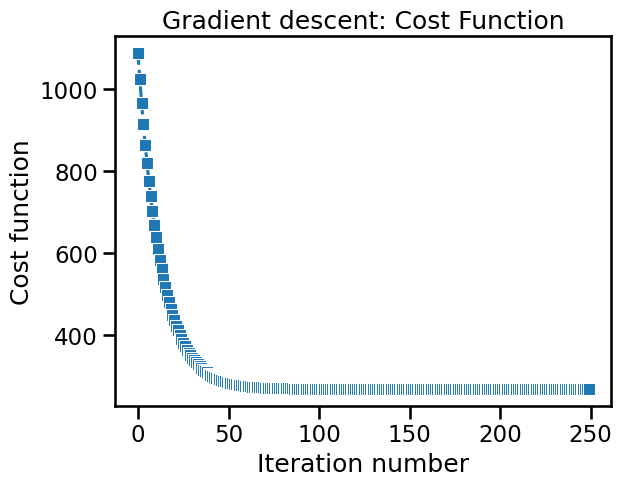

In [22]:
cost_plot()

Compare result of gradient descent with analytical calculation:

In [35]:
#gradient descent
w

array([[ 2.03896276],
       [-1.26659414]])

In [24]:
#formula
import numpy as np
w_analyt =np.linalg.solve(X.T@X, X.T@y)
w0_true, w1_true = w_analyt
w_analyt

array([[ 2.08579266],
       [-1.34923161]])

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = False)
lr.fit(X,y)
lr.coef_

array([[ 2.08579266, -1.34923161]])

Now let's look at how the weights get iteratively optimized.

In [ ]:
w, cache = gradient_descent_optimizer(X, y, learning_rate = 0.001, num_iter = 1000)

In [ ]:
w_0list = []
w_1list = []
for iteration, weight in cache['weight_history'].items():
    w_0list.append(weight[0][0])
    w_1list.append(weight[1][0])

fig, ax = plt.subplots()
sns.scatterplot(x = w_0list, y = w_1list, ax = ax, label = 'Gradient descent')
ax.scatter(w0_true, w1_true, s = 150, c ='r', label = 'Analytical')
ax.set_ylabel('$w_1$')
ax.set_xlabel('$w_0$')
ax.legend()
ax.set_title('History of weight optimization')
plt.show()

Effect of the learning rate:
    
- Affects step size

$$ \Delta \textbf{w} = - \alpha \nabla_\textbf{w} J$$

If our steps are _too big_, we risk skipping over the minimum value (optimal parameters).

If our steps are _too small_, it might take us too long to reach the minimum value.

![learning_rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

Optimization can be made better: 

- many ways to improve the way we take steps
- how we use our training data via sampling can help a lot


Most importantly

- Gradient descent:
    - will be using under the hood for most algorithms from now on.
    - but in many cases want to tune how algorithm optimizes
    - sometimes need to pop the hood and mess around.

## Gradient Descent in Words

- Make a guess at where the function attains its minimum value
- Calculate the gradient/derivative at that point
- Use that value to decide how to make your next guess!

Repeat until we get the derivative as close as we like to 0.

If we want to improve our guess at the minimum of our loss function, we'll move in the **opposite direction** of the gradient away from our last guess. Hence we are using the *gradient* of our loss function to *descend* to the minimum value of the relevant loss function.